# House SalesPrice Prediction using Hypertunned RandomForestRegressor  

In [269]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
warnings.filterwarnings('ignore')

In [270]:
train = pd.read_csv('../input/home-data-for-ml-course/train.csv',index_col=0) #load trainind data
test = pd.read_csv('../input/home-data-for-ml-course/test.csv',index_col=0) #load test data

In [271]:
instances,features = train.shape
print(instances,features)

1460 80


In [272]:
train.head() #first look at data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Type of Data
## Checking the type of data and count of values

In [273]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

At last we can see that we have float64=3, int64=34 and object=43

# Describe your data
.describe() define the numerical features of the datset. Here you can see your data range, count and other statistical information about data

In [274]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Frequency of Sale Price

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

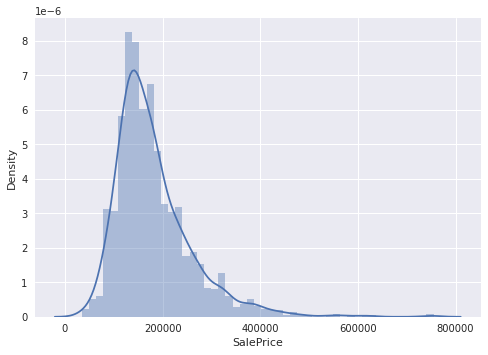

In [275]:
sns.distplot(train.SalePrice)

# Seprate object data and numerical data
## For futher exploring data and analyzing data seprate the numerical data and the object data

In [276]:
train_num = train.select_dtypes(exclude=['object']) # numerical dataframe
train_cat = train.select_dtypes(include=['object']) # object dataframe

In [277]:
train_num.head() #look at the numerical data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [278]:
train_num.describe() #statistic of the numerical data

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [279]:
train_cat.head() #look at the categorical data

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


## Finding Null Values

In [280]:
print("% missing values in data set",round(((train.isnull().sum().sum()/(instances*features))*100),2),"%")

% missing values in data set 5.96 %


We will now look into missing values seprately for numerical and non-numerical data

<AxesSubplot:>

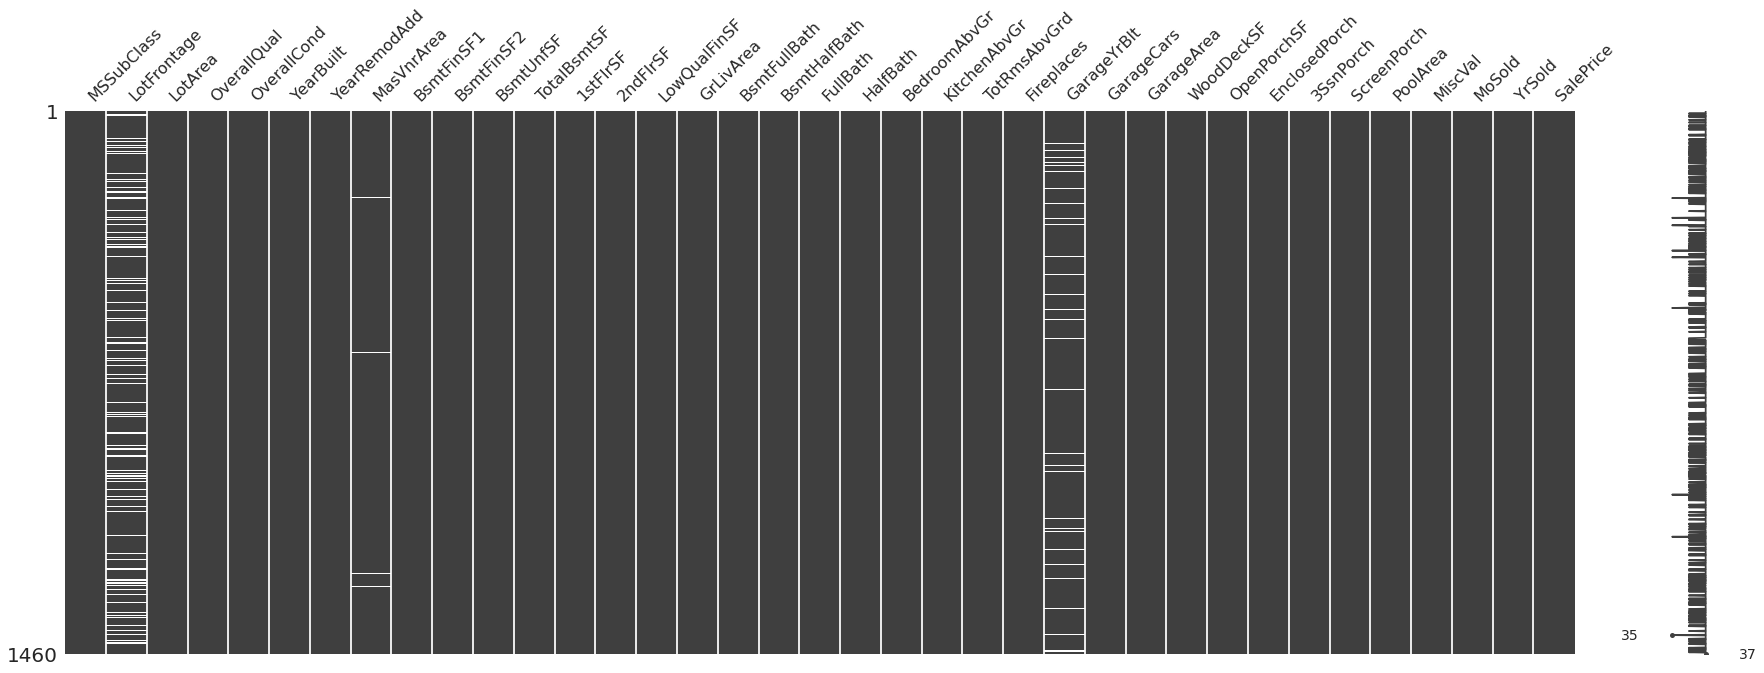

In [282]:
missingno.matrix(train_num, figsize = (30,10))

Above graph shows that in the numerical data LotFrontage and GarageYrBlt have the maximum number of missing values. Lets find out how much the missing values are.

In [283]:
print("% age of missing value in LotFrontage",round((train_num.LotFrontage.isnull().sum()/instances)*100,2),"%")
print("% age of missing value in GarageYrBlt",round((train_num.GarageYrBlt.isnull().sum()/instances)*100,2),"%")

% age of missing value in LotFrontage 17.74 %
% age of missing value in GarageYrBlt 5.55 %


The percent missing values are very less. The percent missing values are very less. We can fix these by taking mean of the total values. We will look this into latter part
We can fix these by taking mean of the total values. We will look this into latter part

<AxesSubplot:>

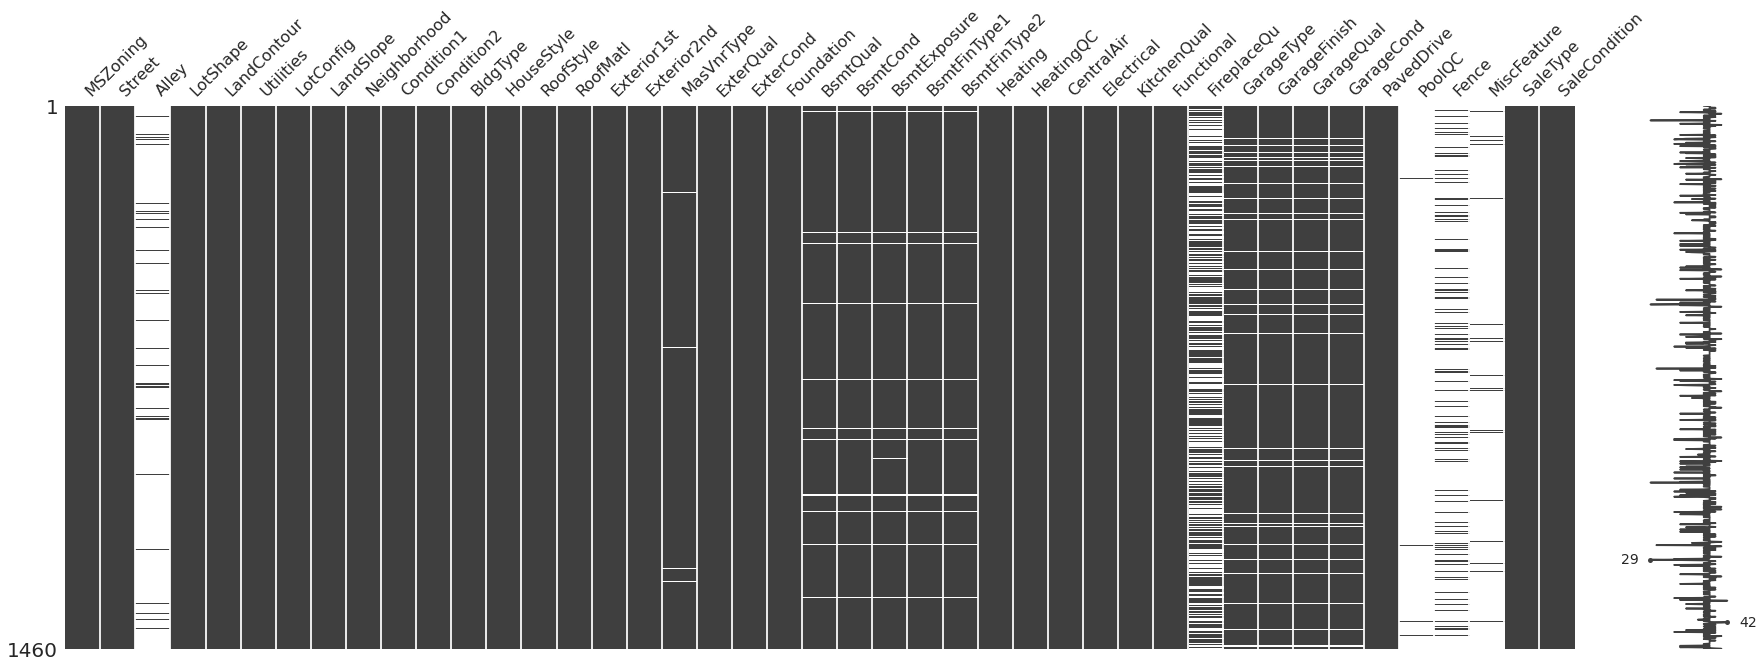

In [284]:
missingno.matrix(train_cat, figsize = (30,10))

Above graph shows that in the numerical data Alley, FirePlaceQu, PoolQC, Fence and MiscFeatures have the maximum number of missing values. Lets find out how much the missing values are.

In [288]:
print("% age of missing value in Alley",round((train_cat.Alley.isnull().sum()/instances)*100,2),"%")
print("% age of missing value in FirePlaceQu",round((train_cat.FireplaceQu.isnull().sum()/instances)*100,2),"%")
print("% age of missing value in PoolQC",round((train_cat.PoolQC.isnull().sum()/instances)*100,2),"%")
print("% age of missing value in Fence ",round((train_cat.Fence.isnull().sum()/instances)*100,2),"%")
print("% age of missing value in MiscFeatures",round((train_cat.MiscFeature.isnull().sum()/instances)*100,2),"%")

% age of missing value in Alley 93.77 %
% age of missing value in FirePlaceQu 47.26 %
% age of missing value in PoolQC 99.52 %
% age of missing value in Fence  80.75 %
% age of missing value in MiscFeatures 96.3 %


The percent missing values are very large >30%. We can fix these by taking mean of the total values. We will look this into latter part

# Sales Price vs Different Features

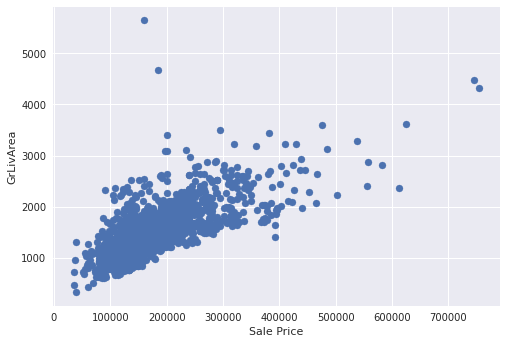

In [289]:
# This plot shows SalePrice vs GrLivArea
plt.scatter(train["SalePrice"],train["GrLivArea"])
plt.ylabel("GrLivArea")
plt.xlabel("Sale Price")
plt.show()

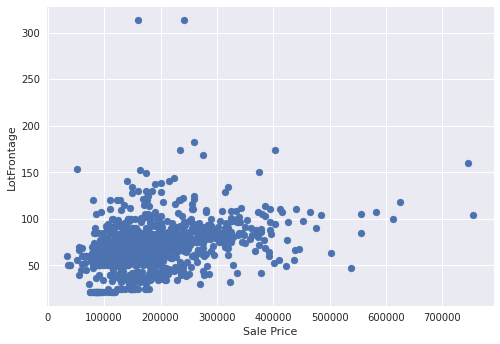

In [290]:
# This plot shows SalePrice vs LotFrontage
plt.scatter(train["SalePrice"],train["LotFrontage"])
plt.ylabel("LotFrontage")
plt.xlabel("Sale Price")
plt.show()

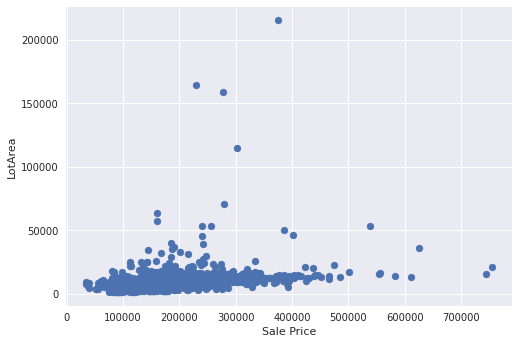

In [291]:
# This plot shows SalePrice vs LotArea
plt.scatter(train["SalePrice"],train["LotArea"])
plt.ylabel("LotArea")
plt.xlabel("Sale Price")
plt.show()

In [292]:
train[(train["GrLivArea"]>4000) & (train["SalePrice"]<200000)] # let's have a look on the outliers in GrLivArea

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


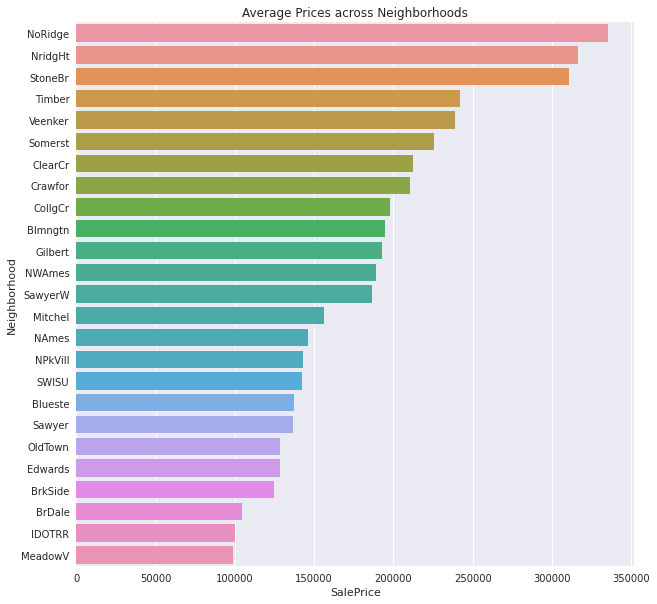

In [293]:
# Comparision barplot of SalePrice in sorted order in accordance to neighborhood
expensive = train.groupby('Neighborhood').mean().SalePrice.sort_values(ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(y=expensive.index, x=expensive.values, order=expensive.index)
plt.xlabel('SalePrice')
plt.title('Average Prices across Neighborhoods');

# Correlation of SalePrice with other features

### Corelation of Object feature with SalePrice

In [294]:
# to check the correlation of object features we need to encode them
# we are here using LabelEncoder() 
from sklearn.preprocessing import LabelEncoder
for c in train_cat:
    lbl = LabelEncoder() 
    train_cat[c] =lbl.fit_transform(list(train_cat[c].values))
train_cat['SalePrice'] = train['SalePrice']

Text(0.5, 1.0, 'Features Correlating of Object data with Sale Price')

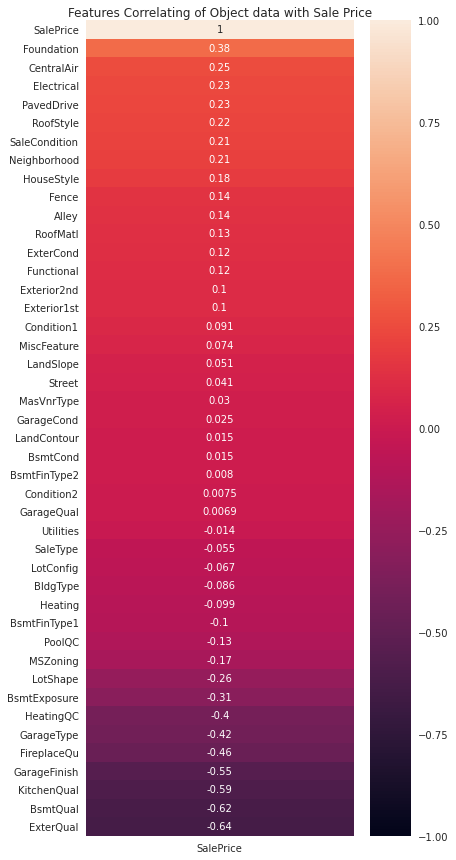

In [295]:
corr_cat = train_cat.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False) # correlation of SalePrice with other features
plt.figure(figsize=(6, 15))
heatmap = sns.heatmap(corr_cat, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating of Object data with Sale Price', fontdict={'fontsize':12}, pad=4)

### Correlation of Numerical Features with SalePrice

Text(0.5, 1.0, 'Features Correlating with Target')

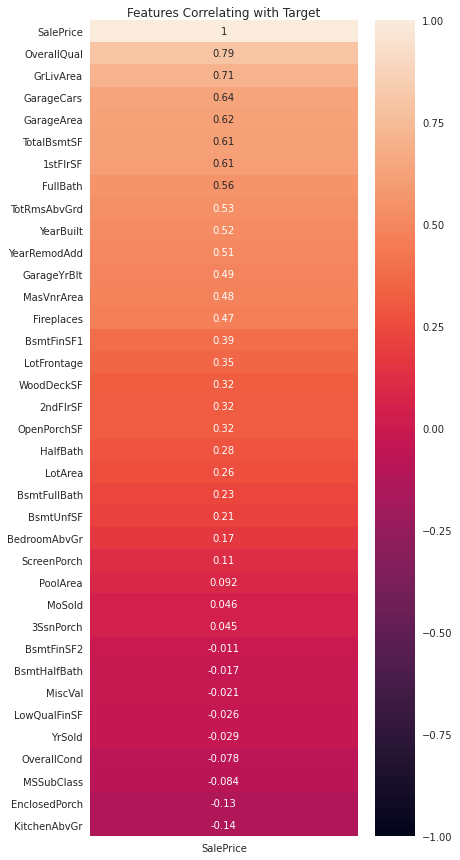

In [296]:
corr_num = train_num.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False)
plt.figure(figsize=(6, 15))
heatmap = sns.heatmap(corr_num, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Features Correlating with Target', fontdict={'fontsize':12}, pad=4)

### Resolving the missing values

In [298]:
train.isnull().sum().sort_values(ascending=False)[0:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
MSSubClass         0
dtype: int64

In [299]:
null_values = train.loc[:,train.isnull().sum()>500].columns # all columns with missing values above than 500 will be stored in null_values
print(null_values)

Index(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')


In [300]:
train.drop(null_values,axis=1, inplace = True) # all the columns in the null_values are being droped

In [301]:
# now here we are filling up the other missing values that are still present in the data set
# for numerical data NAN will be replaced with the mean of the column
# for object data NAN will be replaced with , i.e. the most occuring values in the column
for c in train.columns:
    if (train[c].dtype=='object'):
        train[c]= train[c].fillna(train[c].mode()[0])
    else:
        train[c]= train[c].fillna(train[c].mean())

In [302]:
# now we will encode the main dataset using LabelEncoder()
from sklearn.preprocessing import LabelEncoder
for c in train.columns:
    if (train[c].dtype=='object'):
        lbl = LabelEncoder() 
        train[c] =lbl.fit_transform(list(train[c].values))

# Training Model

In [303]:
Y = train["SalePrice"] # storing the labels in Y
X = train.drop(["SalePrice"],axis=1) # storing the trainind features

Now we will split the data into training and testing set. The split is done in the ratio of 70:30, 70% being the training data and 30% testing data

In [304]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(1022, 74)
(438, 74)
(1022,)
(438,)


In [305]:
# here we will train a base model for RandomForestRegressor()
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(xtrain,ytrain)
print(model.score(xtest,ytest)*100)

85.42852520762551


### Hypertuning the parameter of RandomForestRegressor()
To use RandomizedSearchCV, we first need to create a parameter grid to sample from during fitting:

In [176]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor(criterion='mse')

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(xtest, ytest)
# On each iteration, the algorithm will choose a difference combination of the features. Altogether, there are 2 * 12 * 2 * 3 * 3 * 10 = 4320 \
# settings! However, the benefit of a random search is that we are not trying every combination, but selecting at random to sample a wide range of values.

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

### We can view the best parameters from fitting the random search:

In [177]:
rf_random.best_params_

{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

### We will now evaluate the best parameters and the default parameter


In [178]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    
    accuracy = model.score(test_features,test_labels)*100
    
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy


#### Default Params

In [179]:
base_accuracy = evaluate(model, xtest, ytest)

Model Performance
Average Error: 18195.3275 degrees.
Accuracy = 85.67%.


#### Best Params

In [180]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, xtest, ytest)

Model Performance
Average Error: 8696.4242 degrees.
Accuracy = 96.29%.


## Learing Curve

In [241]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -valid_scores.mean(axis = 1)

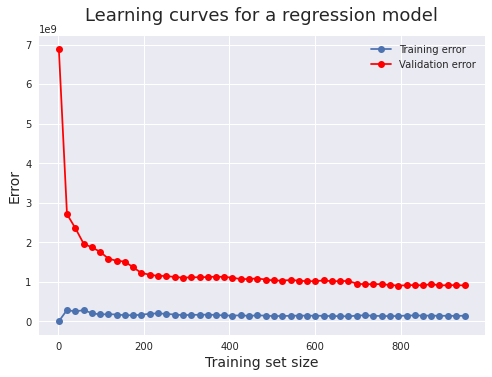

In [251]:
plt.plot(train_sizes, train_scores_mean,'o-', label = 'Training error')
plt.plot(train_sizes, validation_scores_mean,'o-', label = 'Validation error',color='r')
plt.ylabel('Error', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a regression model', fontsize = 18, y = 1.03)
plt.legend()